# Bootstrap Aggregation.

O Bagging (Bootstrap Aggregation) é uma técnica de aprendizado de máquina que combina múltiplos modelos de base para melhorar a precisão e a estabilidade da previsão. Aqui está um passo a passo para implementar o Bagging:

- Dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste. (O conjunto de treinamento é usado para ajustar os modelos de base e o conjunto de teste é usado para avaliar a performance do modelo final).

- Definir o número de modelos de base que serão usados no Bagging e o número de amostras a serem usadas para construir cada modelo. O número de amostras é geralmente escolhido para ser do mesmo tamanho que o conjunto de treinamento original, permitindo que as amostras sejam reutilizadas várias vezes.

- Para cada modelo de base, criar um conjunto de treinamento bootstrap, que é uma amostra aleatória com substituição do conjunto de treinamento original. O bootstrap é criado selecionando aleatoriamente *n* amostras com substituição do conjunto de treinamento original, onde n é o tamanho do conjunto de treinamento original.

- Agregar as previsões de todos os modelos de base usando uma regra de combinação. A regra de combinação mais comum é a média das previsões, mas outras regras, como a mediana, podem ser usadas.

- Avaliar o desempenho do modelo agregado no conjunto de teste. Isso pode ser feito usando várias métricas, como a acurácia, a precisão e o recall.

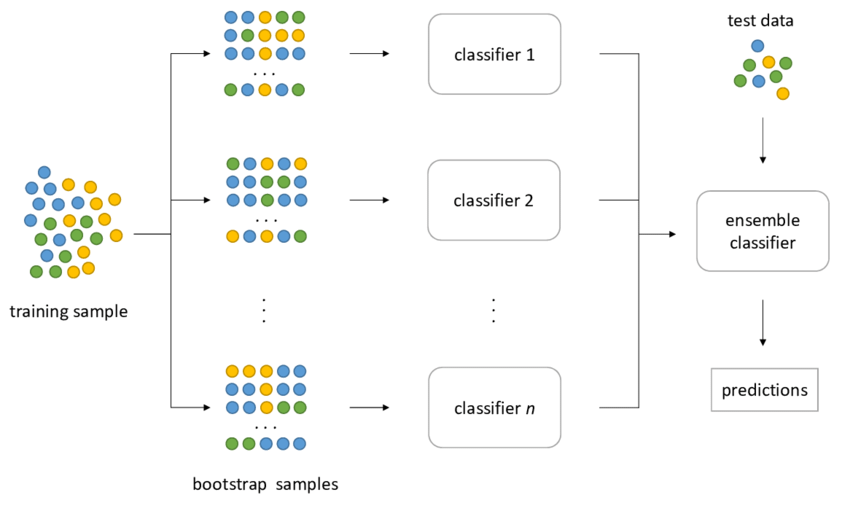

- Opcionalmente, ajustar os hiperparâmetros do modelo de base e do Bagging para melhorar a precisão do modelo final.

- Repetir as etapas 3 a 6 várias vezes com diferentes conjuntos de treinamento bootstrap para obter uma estimativa mais estável do desempenho do modelo agregado.

Finalmente, usar o modelo agregado treinado em todo o conjunto de treinamento para fazer previsões em novos dados de teste.

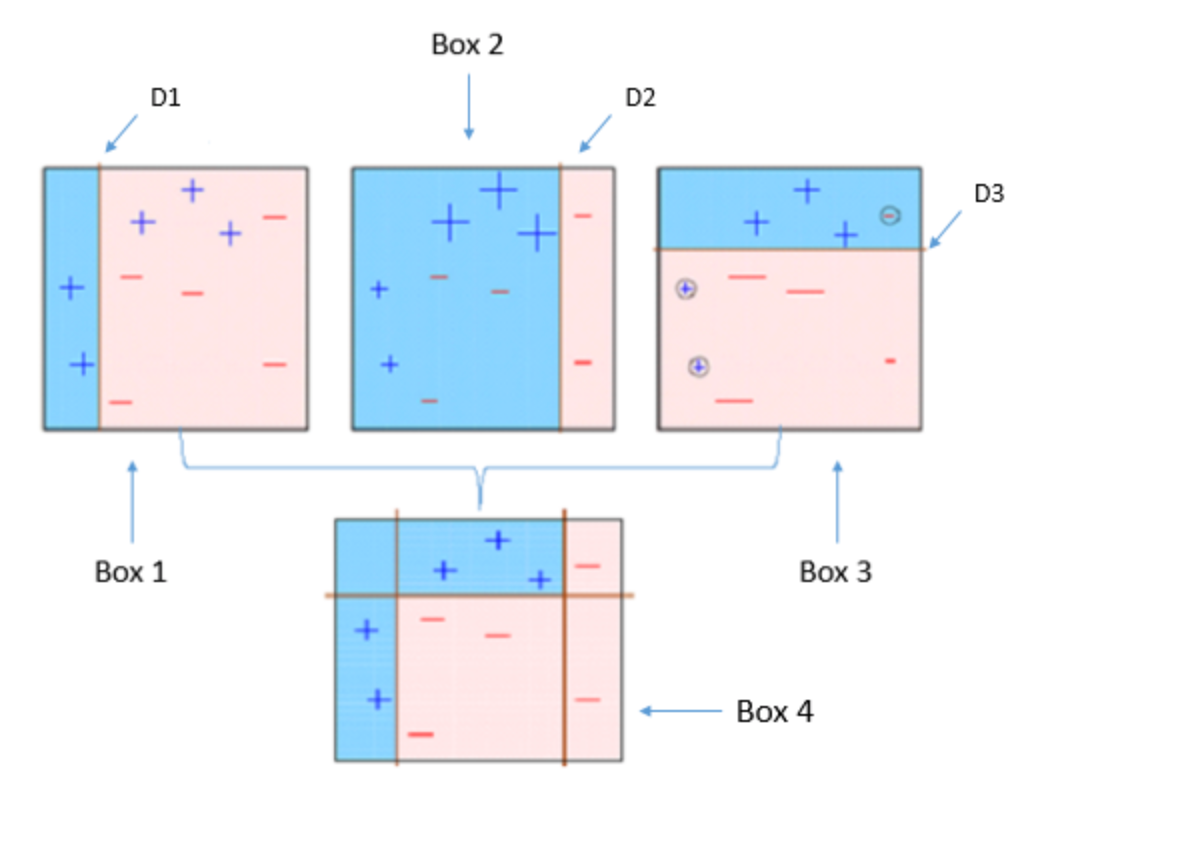


Fontes:
- https://www.researchgate.net/figure/The-bagging-approach-Several-classifier-are-trained-on-bootstrap-samples-of-the-training_fig4_322179244
- https://medium.com/@isnardgurgel/guia-de-bolso-para-ensemble-methods-a97700c66622
- https://www.kaggle.com/code/prashant111/bagging-vs-boosting
- https://lamfo-unb.github.io/2017/09/27/BaggingVsBoosting/


> Em resumo o Bagging é um modelo de aprendizagem de maquina que combina múltiplos modelos de base para melhorar a precisão e a estabilidade da previsão reforçando os acertos dos modelos de base, Ele reduz a variação dos modelos de base e ajuda a evitar o overfitting. Ao combinar as previsões de vários modelos de base, o Bagging pode produzir um modelo final mais robusto e geralmente mais preciso do que qualquer modelo de base individual. O objetivo final do Bagging é aumentar a precisão do modelo final, reduzindo os erros de predição e melhorando a capacidade de generalização, diminuindo assim os falsos positivos e falsos negativos.



### Implentando o passo a passo em python (modelo base de escolha foi uma arvore de classificação).

In [ ]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split

# Definindo um conjunto de treinamento e teste

X = ...
y = ...

X_train, y_test, X_train,y_test = train_test_split(X,y, test_size=0.3, random_state=100)

# Definindo o número de modelos de base a serem usados
n_models = 10

# Definindo o número de amostras a serem usadas para construir cada modelo
n_samples = len(X_train)

# Criando uma lista vazia para armazenar os modelos de base
models = []

# Etapa de Bootstrap
for i in range(n_models):
    # Criando um conjunto de treinamento bootstrap
    X_bootstrap, y_bootstrap = resample(X_train, y_train, n_samples=n_samples)

    # Etapa de Modelagem
    # Criando um modelo de base usando Árvore de Decisão
    model = DecisionTreeClassifier()
    model.fit(X_bootstrap, y_bootstrap)

    # Armazenando o modelo de base na lista de modelos
    models.append(model)

# Etapa de Agregação
# Fazendo previsões em cada modelo de base e armazenando as previsões
predictions = []
for model in models:
    y_pred = model.predict(X_test)
    predictions.append(y_pred)

# Agregando as previsões de todos os modelos de base usando uma regra de combinação (média)
y_final_pred = np.mean(predictions, axis=0)

# Avaliando o desempenho do modelo final no conjunto de teste
accuracy = np.mean(y_final_pred == y_test)
print("Acurácia do modelo final:", accuracy)
